# Taller de regresión Lineal



### Integrantes:
### Laura David
### Mónica González

In [119]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
from IPython.display import display
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Analisis del Data set

In [17]:
# Cargar los datos de entrenamiento
data_train = pd.read_csv("dataset/housing_train.csv")

In [18]:
# Información de los datos de entrenamiento
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
# Dimensiones de train
data_train.shape

(1460, 81)

### CORRECCION DE LOS TIPOS DE DATOS

Se hizo revisión del data set y se identificaron cuales serían las variables numéricas y cuales las categóricas. Y se sacó el listado de cada una de ellas.

In [20]:
# Corregir el tipo de los datos: se tiene un array con las variables numericas 
# y se convierten a categoricas las que no estén en el 
num_cols = [
'Id','LotFrontage','LotArea','OverallQual','OverallCond',
'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
'1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
'MiscVal','MoSold','SalePrice']

# Columnas catagoricas de train
cat_cols_train = []

for col in data_train.columns:
    if col not in num_cols:
        data_train[col] = data_train[col].astype('category')
        cat_cols_train.append(col)

In [21]:
# Información de los datos de entrenamiento
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

### TRATAMIENTO DE DATOS NULOS

In [22]:
# Analisis de datos faltantes en train
missing_values_train = data_train.isnull().sum()
print("Porcentaje de datos nulos en train:", len(missing_values_train[missing_values_train>0]*100/len(data_train)))

Porcentaje de datos nulos en train: 19


In [23]:
# Filtrar datos nulos en train que se encuentren en cualquier columna de cualquier fila
data_train[data_train.isna().any(axis=1)]

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1         60       RL         65.0     8450   Pave   NaN      Reg   
1        2         20       RL         80.0     9600   Pave   NaN      Reg   
2        3         60       RL         68.0    11250   Pave   NaN      IR1   
3        4         70       RL         60.0     9550   Pave   NaN      IR1   
4        5         60       RL         84.0    14260   Pave   NaN      IR1   
...    ...        ...      ...          ...      ...    ...   ...      ...   
1455  1456         60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457         20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458         70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459         20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460         20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition SalePrice  
0         2   2008        WD         Normal    208500  
1         5   2007        WD         Normal    181500  
2         9   2008        WD         Normal    223500  
3         2   2006        WD        Abnorml    140000  
4        12   2008        WD         Normal    250000  
...     ...    ...       ...            ...       ...  
1455      8   2007        WD         Normal    175000  
1456      2   2010        WD         Normal    210000  
1457      5   2010        WD         Normal    266500  
1458      4   2010        WD         Normal    142125  
1459      6   2008        WD         Normal    147500  

[1460 rows x 81 columns]

In [24]:
# Se revisa que datos están nulos (NaN) por cada variable de train

# Filtrar las columnas con valores nulos mayores a 0
missing_values_train = missing_values_train[missing_values_train > 0]

# Crear un DataFrame
pd.DataFrame({'Variable': missing_values_train.index, 'Cantidad de Valores Nulos': missing_values_train.values})

Variable  Cantidad de Valores Nulos
0    LotFrontage                        259
1          Alley                       1369
2     MasVnrType                        872
3     MasVnrArea                          8
4       BsmtQual                         37
5       BsmtCond                         37
6   BsmtExposure                         38
7   BsmtFinType1                         37
8   BsmtFinType2                         38
9     Electrical                          1
10   FireplaceQu                        690
11    GarageType                         81
12   GarageYrBlt                         81
13  GarageFinish                         81
14    GarageQual                         81
15    GarageCond                         81
16        PoolQC                       1453
17         Fence                       1179
18   MiscFeature                       1406

In [25]:
#Se eliminan las variables del data set porque son demasiados datos perdidos
data_train= data_train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [26]:
# Se vuelven a calcular los valores nulos por columna
missing_values_train = data_train.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]

# Crear un DataFrame
pd.DataFrame({'Variable': missing_values_train.index, 'Cantidad de Valores Nulos': missing_values_train.values})

Variable  Cantidad de Valores Nulos
0    LotFrontage                        259
1     MasVnrType                        872
2     MasVnrArea                          8
3       BsmtQual                         37
4       BsmtCond                         37
5   BsmtExposure                         38
6   BsmtFinType1                         37
7   BsmtFinType2                         38
8     Electrical                          1
9     GarageType                         81
10   GarageYrBlt                         81
11  GarageFinish                         81
12    GarageQual                         81
13    GarageCond                         81

Se puede visualizar que ya sólo aparecen 13 variables con valores perdidos

Se hace un reeemplazo de los valores faltantes de las variables categóricas que no son numeros a la palabra 'None', ya que para nosotras el NA es un no aplica y en las varibles que son categóricas pero que se refieren a años se hizo el cambio por 1900 ya que es un año que no afecta y puede requerirse para algún calculo más adelante.
Y para las variables de tipo numerico se reemplazó el NA por un 0.

In [27]:
# Variables a reemplazar de tipo categorico
cols_NA_categTexto= ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Electrical','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Se adiciona a las variables categoricas la categoría 'None'
for col in cols_NA_categTexto:
    if data_train[col].dtype.name == 'category':
        # Agregar 'None' como categoría
        data_train[col] = data_train[col].cat.add_categories(['None'])

# Reemplazo de NA por el valor None
data_train[cols_NA_categTexto] = data_train[cols_NA_categTexto].fillna('None')

# Reemplazo de NA por el valor 0 en columnas numericas
cols_NA_categNumericas= ['GarageYrBlt']

# Se adiciona a las variables categoricas la categoría '0'
for col in cols_NA_categNumericas:
    if data_train[col].dtype.name == 'category':
        # Agregar '1900' como categoría
        data_train[col] = data_train[col].cat.add_categories(['1900'])

data_train[cols_NA_categNumericas] = data_train[cols_NA_categNumericas].fillna('1900')   

# Variables a reemplazar de tipo numérico
data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(0)  
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(0) 

In [28]:
# Analisis de datos faltantes en train
missing_values_train = data_train.isnull().sum()
print("Porcentaje de datos nulos en train:", len(missing_values_train[missing_values_train>0]*100/len(data_train)))

Porcentaje de datos nulos en train: 0


In [29]:
# Se vuelven a calcular los valores nulos por columna
missing_values_train = data_train.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]

# Crear un DataFrame
pd.DataFrame({'Variable': missing_values_train.index, 'Cantidad de Valores Nulos': missing_values_train.values})

Empty DataFrame
Columns: [Variable, Cantidad de Valores Nulos]
Index: []

Se puede observar que ya no hay datos nulos en el data set de train

In [30]:
# Analisis de datos faltantes en train
missing_values_train = data_train.isnull().sum()
print("Porcentaje de datos nulos en train:", len(missing_values_train[missing_values_train>0]*100/len(data_train)))

Porcentaje de datos nulos en train: 0


### ANALISIS DE REGISTROS DUPLICADOS

In [35]:
# Analisis de registros duplicados exactos
print("Número de duplicados en train:", data_train.duplicated().sum())

Número de duplicados en train: 0


In [43]:
#Se elimina el id (No afecta a la clasificación) pero es un dato irrelevante y distractor
data_train= data_train.drop(['Id'], axis=1)

In [38]:
# Se elimina el Id del array de num_cols    
num_cols.remove('Id')     

In [40]:
# Analisis de registros duplicados exactos despues de eliminar el id
print("Número de duplicados en train:", data_train.duplicated().sum())

Número de duplicados en train: 0


In [44]:
# Información de los datos de entrenamiento
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   ca

# ANALISIS EXPLORATORIO

## REVISIÓN VARIABLES NUMÉRICAS

In [45]:
# Resumen estadístico para train
data_train.describe()

LotFrontage        LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     57.623288   10516.828082     6.099315     5.575342   103.117123   
std      34.664304    9981.264932     1.382997     1.112799   180.731373   
min       0.000000    1300.000000     1.000000     1.000000     0.000000   
25%      42.000000    7553.500000     5.000000     5.000000     0.000000   
50%      63.000000    9478.500000     6.000000     5.000000     0.000000   
75%      79.000000   11601.500000     7.000000     6.000000   164.250000   
max     313.000000  215245.000000    10.000000     9.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712  ...   
std     456.098091   161.319273   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000  ...   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000  ...   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041     6.321918  180921.195890  
std      55.757415    40.177307    496.123024     2.703626   79442.502883  
min       0.000000     0.000000      0.000000     1.000000   34900.000000  
25%       0.000000     0.000000      0.000000     5.000000  129975.000000  
50%       0.000000     0.000000      0.000000     6.000000  163000.000000  
75%       0.000000     0.000000      0.000000     8.000000  214000.000000  
max     480.000000   738.000000  15500.000000    12.000000  755000.000000  

[8 rows x 32 columns]

### CORRELACION DE LOS DATOS NUMÉRICOS

Se revisa la correlación de las variables numericas contra SalePrice

In [46]:
# Calcular la correlación entre variables numericas

# Convertir correlaciones a DataFrame para mejor visualización
correlaciones_df = data_train[num_cols].corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

# Mostrar el DataFrame
correlaciones_df

SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
LotFrontage     0.209624
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
LowQualFinSF   -0.025606
OverallCond    -0.077856
EnclosedPorch  -0.128578
KitchenAbvGr   -0.135907

In [47]:
#Matriz de correlación
# Seleccionar solo las columnas numéricas del DataFrame
numeric_data = data_train[num_cols]  # num_cols contiene las columnas numéricas

# Calcular la matriz de correlación
numeric_data.corr()


LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
LotFrontage       1.000000  0.100739     0.176561    -0.053457    0.105010   
LotArea           0.100739  1.000000     0.105806    -0.005636    0.103321   
OverallQual       0.176561  0.105806     1.000000    -0.091932    0.407252   
OverallCond      -0.053457 -0.005636    -0.091932     1.000000   -0.125694   
MasVnrArea        0.105010  0.103321     0.407252    -0.125694    1.000000   
BsmtFinSF1        0.076670  0.214103     0.239666    -0.046231    0.261256   
BsmtFinSF2       -0.009312  0.111170    -0.059119     0.040229   -0.071330   
BsmtUnfSF         0.160829 -0.002618     0.308159    -0.136841    0.113862   
TotalBsmtSF       0.238274  0.260833     0.537808    -0.171098    0.360067   
1stFlrSF          0.245181  0.299475     0.476224    -0.144203    0.339850   
2ndFlrSF          0.042549  0.050986     0.295493     0.028942    0.173800   
LowQualFinSF      0.049981  0.004779    -0.030429     0.025494   -0.068628   
GrLivArea         0.220347  0.263116     0.593007    -0.079686    0.388052   
BsmtFullBath      0.010514  0.158155     0.111098    -0.054942    0.083010   
BsmtHalfBath     -0.027856  0.048046    -0.040150     0.117821    0.027403   
FullBath          0.120548  0.126031     0.550600    -0.194149    0.272999   
HalfBath         -0.012952  0.014259     0.273458    -0.060769    0.199108   
BedroomAbvGr      0.144494  0.119690     0.101676     0.012980    0.102775   
KitchenAbvGr      0.034425 -0.017784    -0.183882    -0.087001   -0.038450   
TotRmsAbvGrd      0.221396  0.190015     0.427452    -0.057583    0.279568   
Fireplaces        0.044018  0.271364     0.396765    -0.023820    0.247015   
GarageCars        0.165229  0.154871     0.600671    -0.185758    0.361945   
GarageArea        0.201473  0.180403     0.562022    -0.151521    0.370884   
WoodDeckSF       -0.016780  0.171698     0.238923    -0.003334    0.159991   
OpenPorchSF       0.069605  0.084774     0.308819    -0.032589    0.122528   
EnclosedPorch     0.027366 -0.018340    -0.113937     0.070356   -0.109907   
3SsnPorch         0.023499  0.020423     0.030371     0.025504    0.019144   
ScreenPorch       0.022969  0.043160     0.064886     0.054811    0.062248   
PoolArea          0.114106  0.077672     0.065166    -0.001985    0.011928   
MiscVal          -0.059606  0.038068    -0.031406     0.068777   -0.029512   
MoSold            0.018942  0.001205     0.070815    -0.003511   -0.006723   
SalePrice         0.209624  0.263843     0.790982    -0.077856    0.472614   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  \
LotFrontage      0.076670   -0.009312   0.160829     0.238274  0.245181  ...   
LotArea          0.214103    0.111170  -0.002618     0.260833  0.299475  ...   
OverallQual      0.239666   -0.059119   0.308159     0.537808  0.476224  ...   
OverallCond     -0.046231    0.040229  -0.136841    -0.171098 -0.144203  ...   
MasVnrArea       0.261256   -0.071330   0.113862     0.360067  0.339850  ...   
BsmtFinSF1       1.000000   -0.050117  -0.495251     0.522396  0.445863  ...   
BsmtFinSF2      -0.050117    1.000000  -0.209294     0.104810  0.097117  ...   
BsmtUnfSF       -0.495251   -0.209294   1.000000     0.415360  0.317987  ...   
TotalBsmtSF      0.522396    0.104810   0.415360     1.000000  0.819530  ...   
1stFlrSF         0.445863    0.097117   0.317987     0.819530  1.000000  ...   
2ndFlrSF        -0.137079   -0.099260   0.004469    -0.174512 -0.202646  ...   
LowQualFinSF    -0.064503    0.014807   0.028167    -0.033245 -0.014241  ...   
GrLivArea        0.208171   -0.009640   0.240257     0.454868  0.566024  ...   
BsmtFullBath     0.649212    0.158678  -0.422900     0.307351  0.244671  ...   
BsmtHalfBath     0.067418    0.070948  -0.095804    -0.000315  0.001956  ...   
FullBath         0.058543   -0.076444   0.288886     0.323722  0.380637  ...   
HalfBath         0.004262   -0.032148  -0.041118    -0.048804 -0.119916  ...   


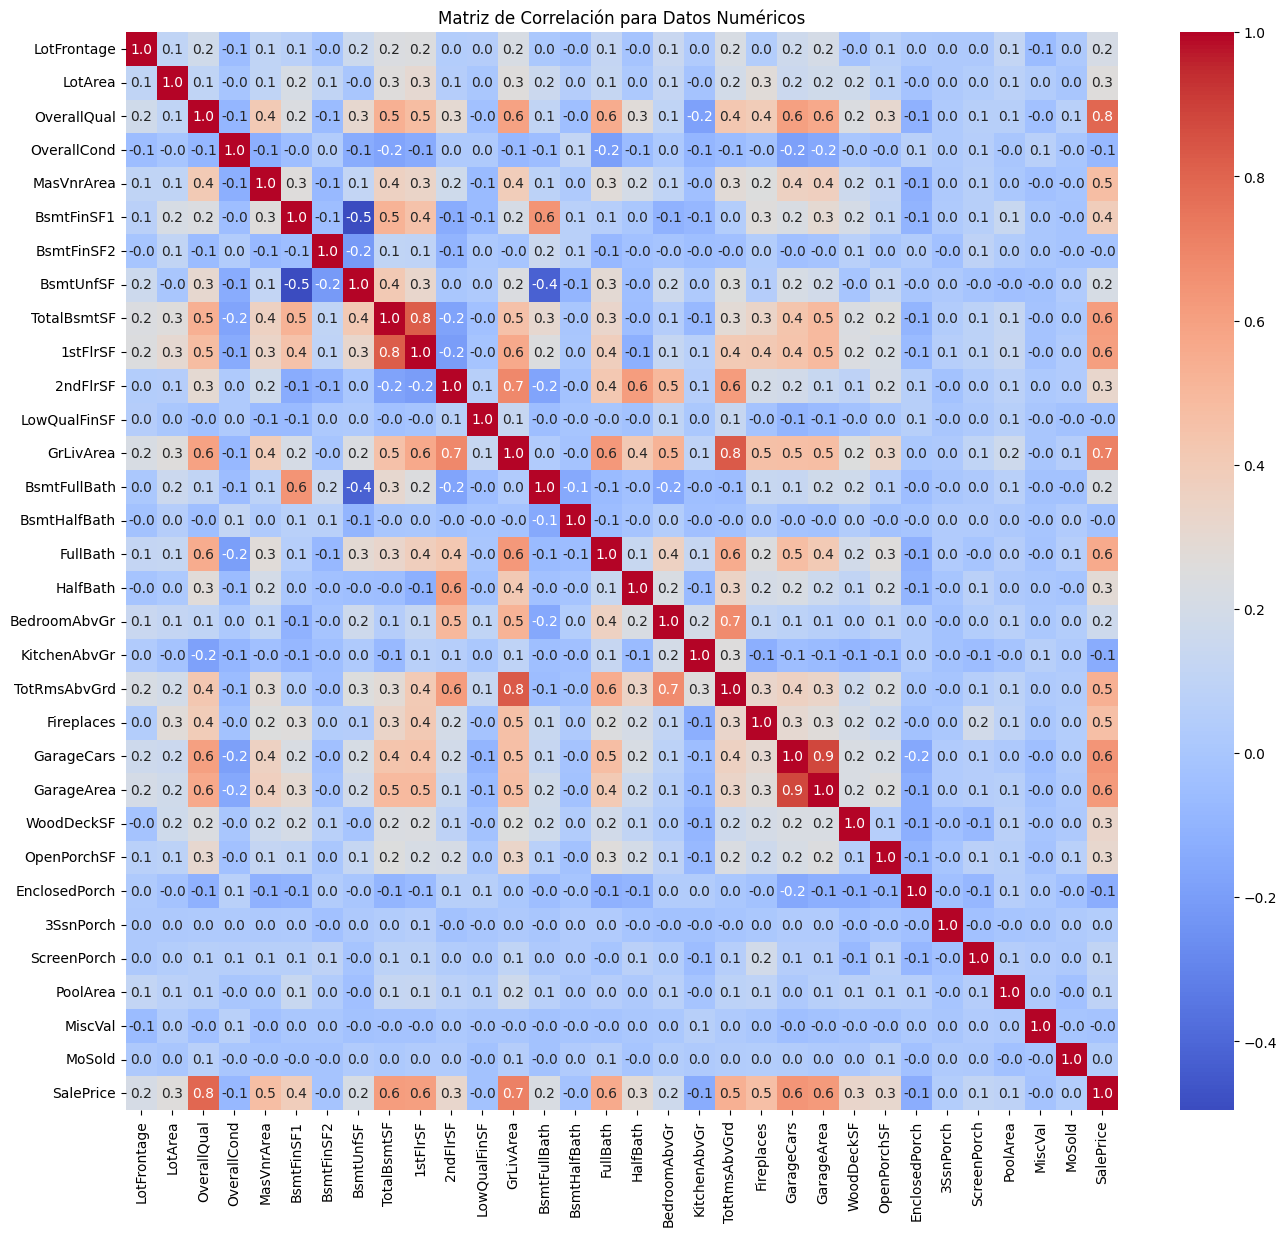

In [48]:
#Graficas de correlación
numeric_data = data_train[num_cols]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación para Datos Numéricos")
plt.show()

Después de observar la correlación de las variables numericas, se identifican que las variables mas relevantes para el modelo son aquellas que tiene una correlación mayor a .5 con la variable 'SalePrice', entonces las que tengan una correlación menor serán excluidas del modelo

In [49]:
# Crear una lista de variables con correlación menor a 0.5
variables_numericas_excluir = correlaciones_df[correlaciones_df['SalePrice'] < 0.5].index.tolist()

# Excluir la variable objetivo 'SalePrice', si está presente
variables_numericas_excluir = [var for var in variables_numericas_excluir if var != 'SalePrice']

# Mostrar todas las variables a excluir
print("Variables numéricas con correlación menor a 0.5 con 'SalePrice':")
for var in variables_numericas_excluir:
    print(var)


Variables numéricas con correlación menor a 0.5 con 'SalePrice':
MasVnrArea
Fireplaces
BsmtFinSF1
WoodDeckSF
2ndFlrSF
OpenPorchSF
HalfBath
LotArea
BsmtFullBath
BsmtUnfSF
LotFrontage
BedroomAbvGr
ScreenPorch
PoolArea
MoSold
3SsnPorch
BsmtFinSF2
BsmtHalfBath
MiscVal
LowQualFinSF
OverallCond
EnclosedPorch
KitchenAbvGr


In [50]:
# Se eliminan las variables con correlación menor a 0.5
data_train = data_train.drop(variables_numericas_excluir, axis=1)

### Distribución de variables numéricas

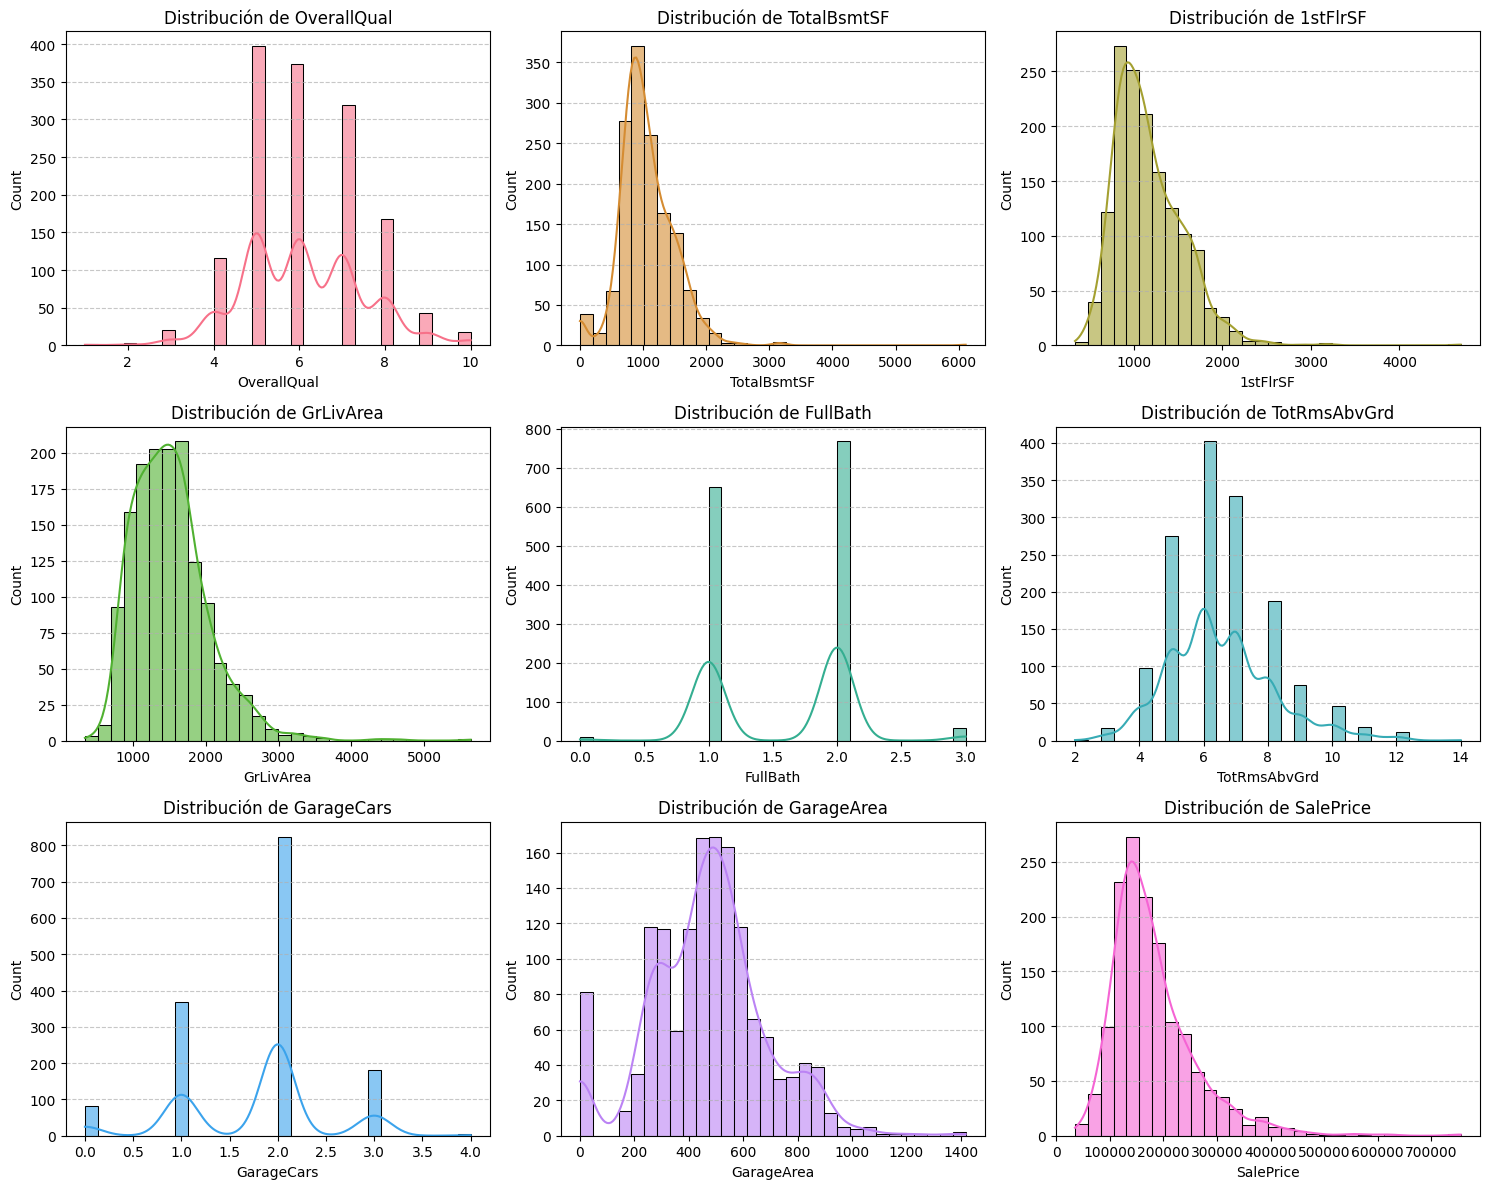

In [51]:
# Se vuelven a obtener las columnas numéricas actualizadas
num_cols = data_train.select_dtypes(include=['float64', 'int64']).columns

# Lista de colores para las gráficas
colors = sns.color_palette("husl", len(num_cols))  # Paleta de colores basada en la cantidad de variables

# Número de filas y columnas en el grid
cols_per_row = 3
rows = math.ceil(len(num_cols) / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows * 4))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

for i, col in enumerate(num_cols):
    sns.histplot(data=data_train, x=col, kde=True, bins=30, ax=axes[i], color=colors[i], alpha=0.6)
    axes[i].set_title(f'Distribución de {col}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ocultar los ejes vacíos si hay menos variables que espacios en el grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## REVISIÓN VARIABLES CATEGÓRICAS

In [52]:
# Identificar columnas categóricas basadas en su tipo de dato
variables_categoricas = data_train.select_dtypes(include=['category']).columns.tolist()

# Mostrar las variables categóricas
print("Variables categóricas:", variables_categoricas)

Variables categóricas: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'YrSold', 'SaleType', 'SaleCondition']


In [53]:
# Mostrar valores únicos y cantidad de valores únicos de las variables categóricas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas sin límite
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas sin límite
pd.set_option('max_colwidth', None)  # Mostrar valores completos sin truncar

# Mostrar todas las variables categóricas y sus valores únicos
for col in variables_categoricas:
    print(f'Variable: {col}')
    unique_values = list(data_train[col].unique())  # Convertimos a lista para evitar truncamiento
    print(f'Valores únicos ({len(unique_values)}):')
    print(unique_values)  # Imprimir todos los valores
    print('-' * 50)


Variable: MSSubClass
Valores únicos (15):
[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40]
--------------------------------------------------
Variable: MSZoning
Valores únicos (5):
['RL', 'RM', 'C (all)', 'FV', 'RH']
--------------------------------------------------
Variable: Street
Valores únicos (2):
['Pave', 'Grvl']
--------------------------------------------------
Variable: LotShape
Valores únicos (4):
['Reg', 'IR1', 'IR2', 'IR3']
--------------------------------------------------
Variable: LandContour
Valores únicos (4):
['Lvl', 'Bnk', 'Low', 'HLS']
--------------------------------------------------
Variable: Utilities
Valores únicos (2):
['AllPub', 'NoSeWa']
--------------------------------------------------
Variable: LotConfig
Valores únicos (5):
['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
--------------------------------------------------
Variable: LandSlope
Valores únicos (3):
['Gtl', 'Mod', 'Sev']
--------------------------------------------------
Variable

In [54]:
# Obtener un resumen descriptivo transpuesto para variables categóricas
resumen_categoricas = data_train[variables_categoricas].describe(include='all').T

# Mostrar el resumen
print(resumen_categoricas)

              count unique      top  freq
MSSubClass     1460     15       20   536
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
YearBuilt      1460    112     2006    67
YearRemodAdd   1460     61     1950   178
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1460      4     None   872
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PCon

### ANALISIS ANOVA

El objetivo es determinar si la variable categórica tiene un efecto significativo sobre la variable objetivo, comparando las medias de los diferentes grupos.

H0: No existe una diferencia estadísticamente significativa entre las medias de los grupos definidos por la variable categórica en relación a la variable objetivo.

H1: Existe al menos una diferencia estadísticamente significativa entre las medias de los grupos definidos por la variable categórica en relación a la variable objetivo.

In [55]:
# Se aplica análisis ANOVA para descartar variables categoricas no significativas
# para la prediccion de la variable objetivo
import scipy.stats as stats

def anova_test(df, target, feature):
  df_anova = df[[feature, target]]
  grps = pd.unique(df[feature].values)
  d_data = {grp:df_anova[target][df_anova[feature] == grp].to_numpy() for grp in grps}
  result = ""
  test_grps = [d_data[grp] for grp in grps]
  F, p = stats.f_oneway(*test_grps)
  
  if p > 0.05:
    print("p-value for significance is: ", p)
    print("accept null hypothesis")
    result="{0} groups' are not different".format(feature)
    print(result)
    print('-'*50)

In [56]:
# Se realiza la prueba para cada variable numérica y se encuentra que
# dentro de cada una existe evidencia para afirmar que hay diferencias entre
# los grupos de pacientes con y sin enfermedad cardiaca
# Se rechaza entonces la hipótesis nula
for var in variables_categoricas:
    anova_test(data_train, 'SalePrice', var)  

p-value for significance is:  0.11704860406782483
accept null hypothesis
Street groups' are not different
--------------------------------------------------
p-value for significance is:  0.584716773968938
accept null hypothesis
Utilities groups' are not different
--------------------------------------------------
p-value for significance is:  0.1413963584114019
accept null hypothesis
LandSlope groups' are not different
--------------------------------------------------
p-value for significance is:  0.6300887663573457
accept null hypothesis
YrSold groups' are not different
--------------------------------------------------


Con el analisis ANOVA se identican que las variables categóricas: Street , Utilities , LandSlope  y YrSold son las que menos efecto significativo sobre la variable objetivo tienen y por este motivo las removeremos del modelo.

In [57]:
# Se eliminan las variables del data set que nos arrojó el análisis ANOVA
data_train= data_train.drop(['Street', 'Utilities', 'LandSlope', 'YrSold'], axis=1)

Se realiza un mapa de calor para ver la matriz de correlación entre las variables numéricas e identificar que otras variables se pueden descartar del modelo porque tengan multicoolinealidad.

<Axes: >

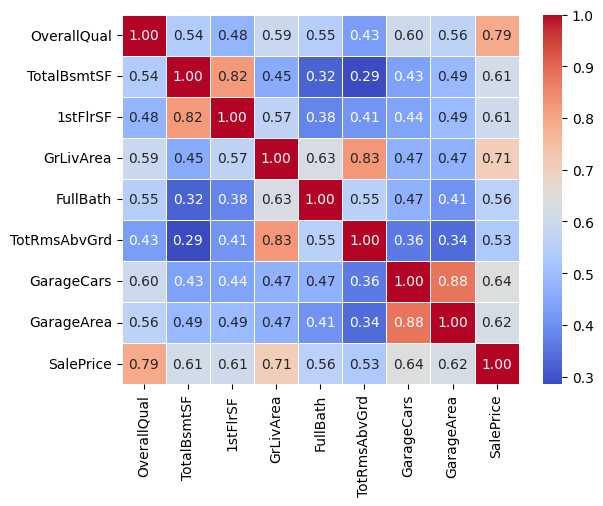

In [58]:
# Correlación entre variables numéricas
sns.heatmap(data_train.corr(method='pearson', numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', linewidth=.5)

In [59]:
# Se detectó multicolinealidad entre las variables numéricas predictoras. 
# Se eliminaron aquellas con menor correlación con 'SalePrice' en cada par donde el coeficiente de correlación superaba 0.7.
data_train= data_train.drop(['GarageArea', 'TotRmsAbvGrd', '1stFlrSF'], axis=1)

<Axes: >

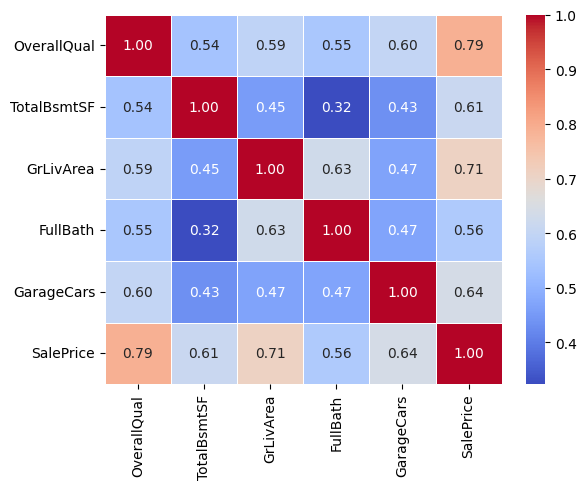

In [60]:
# Se aplica nuevamente la correlación entre variables numéricas
sns.heatmap(data_train.corr(method='pearson', numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', linewidth=.5)

Histograma de las variables numericas

<Figure size 1200x800 with 0 Axes>

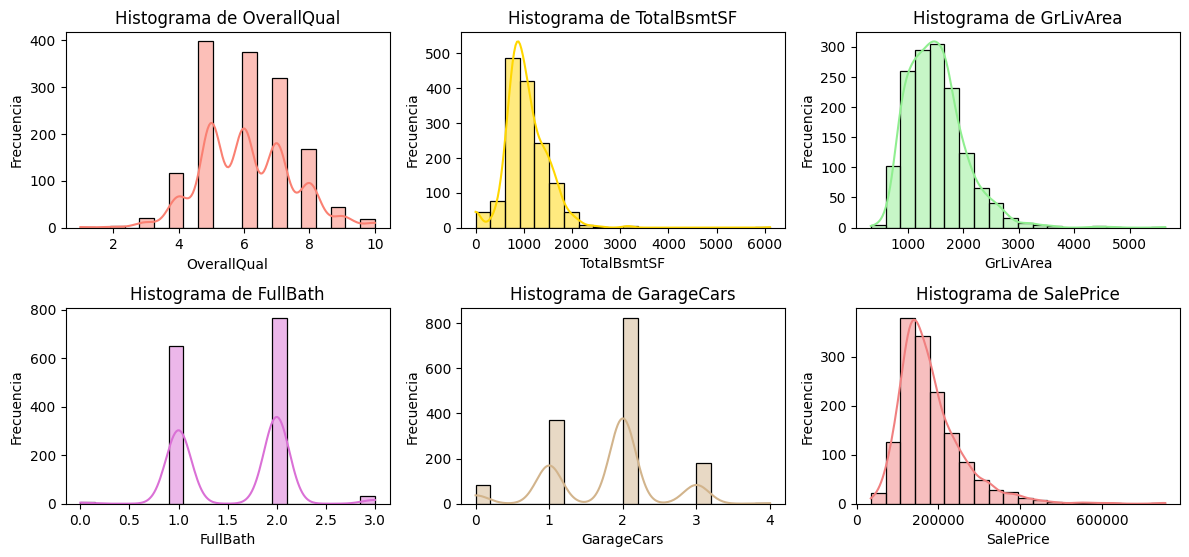

In [65]:
# Filtrar solo las columnas numéricas
numeric_columns = data_train.select_dtypes(include=['float64', 'int64'])

# Crear el gráfico
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura

# Lista de colores para los gráficos
colors = ['skyblue', 'salmon', 'gold', 'lightgreen', 'orchid', 'tan', 'lightcoral', 'deepskyblue', 'lime']

# Crear el gráfico
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura

# Graficar los histogramas para cada variable numérica
for i, column in enumerate(numeric_columns.columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid de subgráficos
    sns.histplot(numeric_columns[column], kde=True, bins=20, color=colors[i % len(colors)])  # Color rotativo
    plt.title(f'Histograma de {column}')  # Título del gráfico
    plt.xlabel(column)  # Etiqueta del eje X
    plt.ylabel('Frecuencia')  # Etiqueta del eje Y

# Ajustar el diseño para que no se superpongan los gráficos
plt.tight_layout()
plt.show()


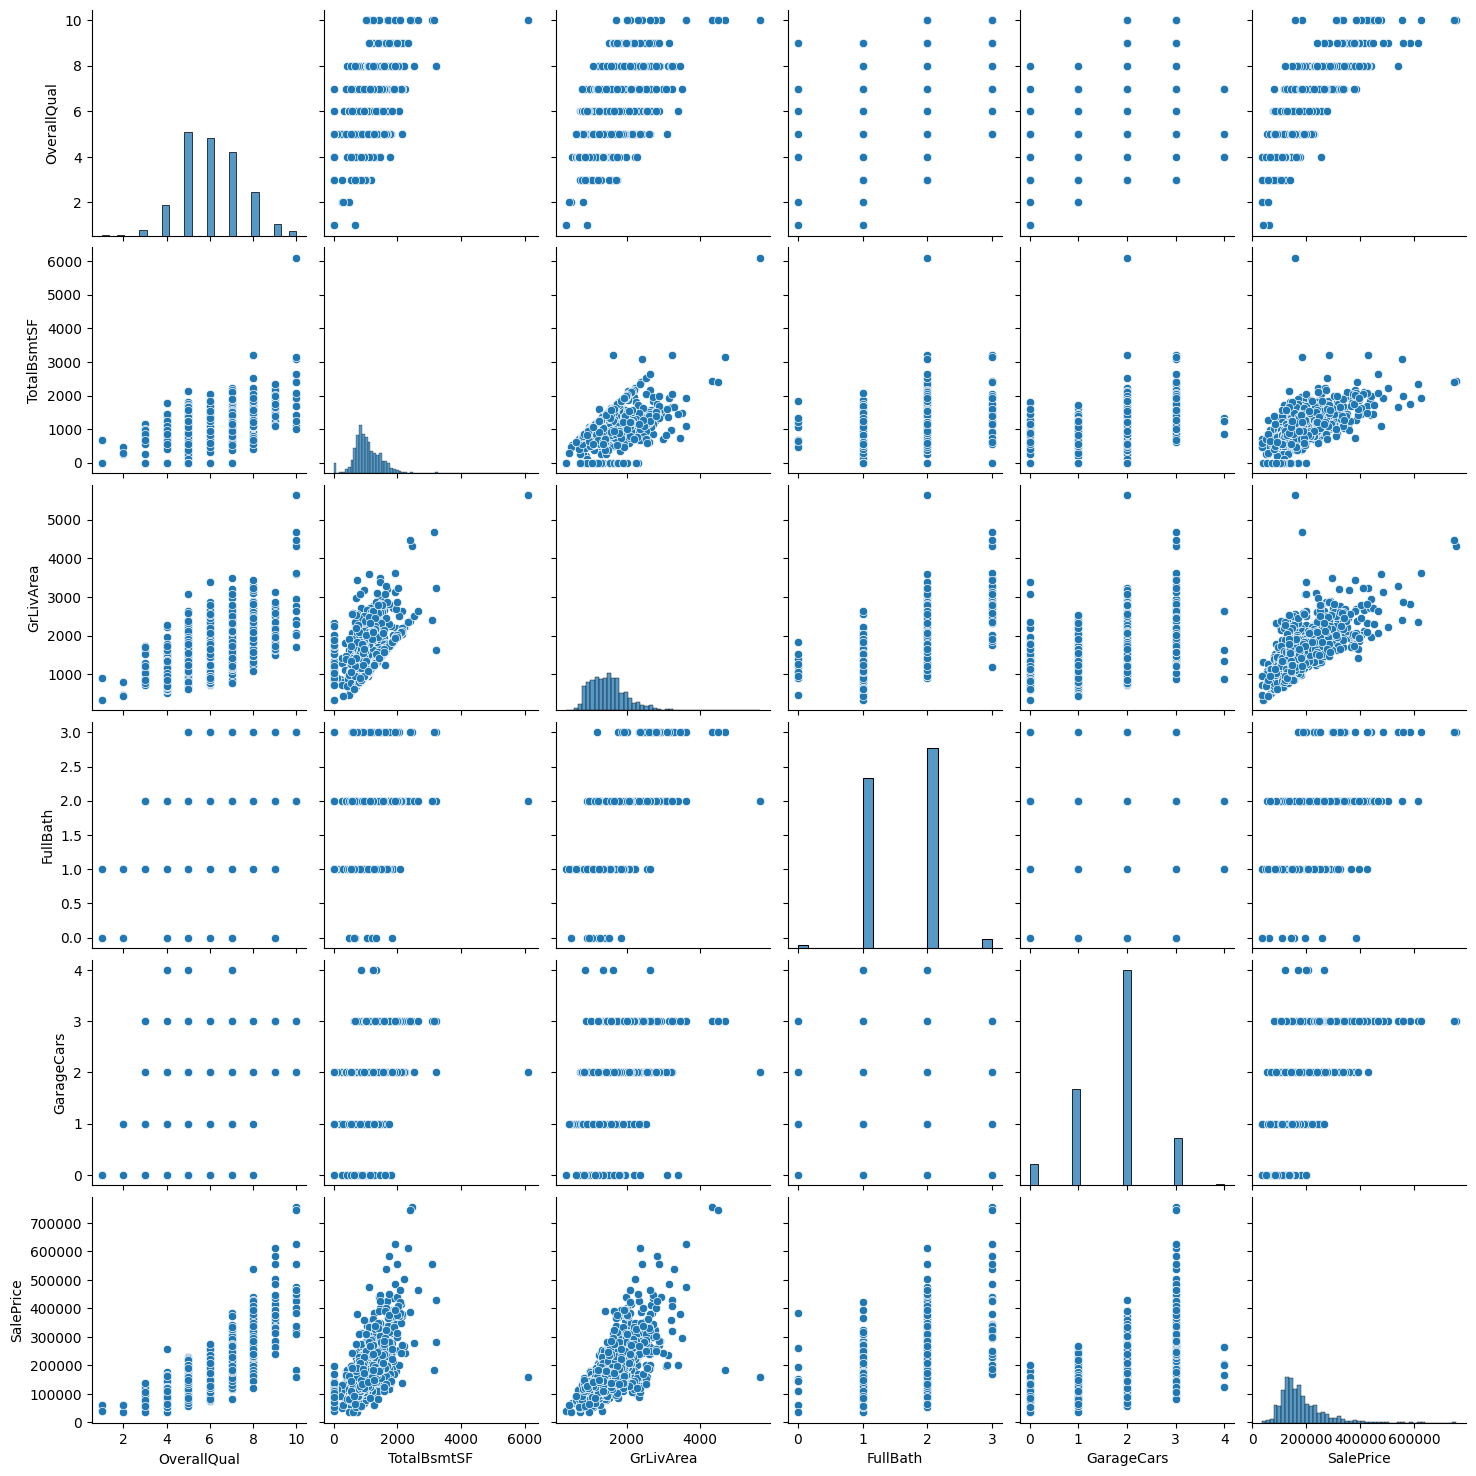

In [66]:
# Diagrama de pares de todas las variables numericas del data set
sns.pairplot(data_train)

### Detección de valores atípicos

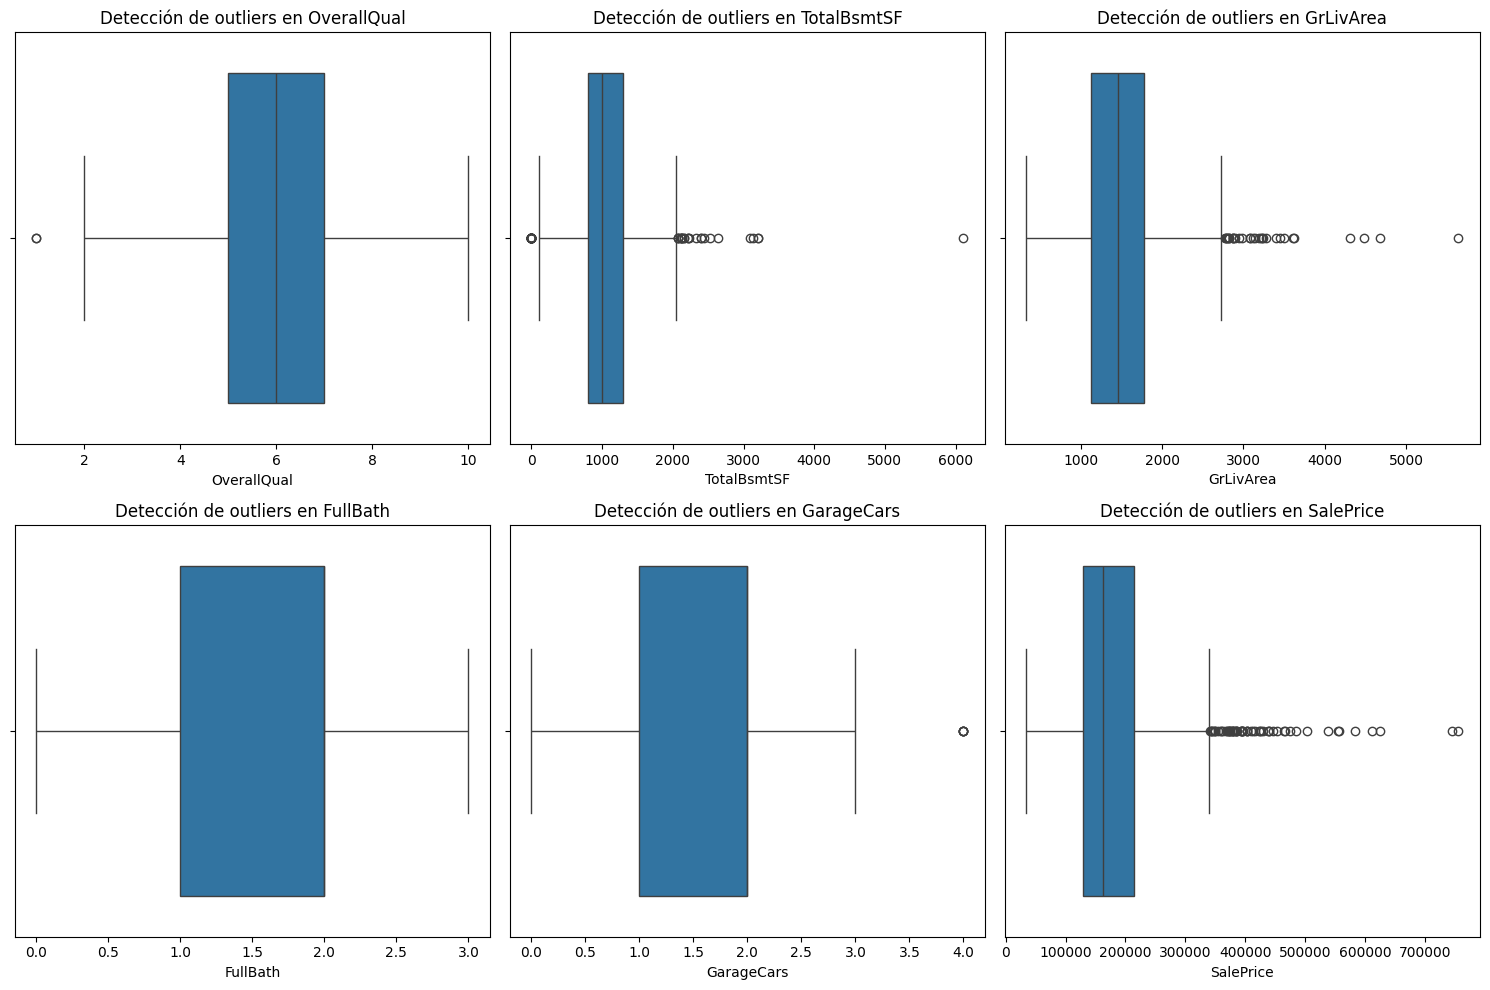

In [ ]:
# Detección de outliers en variables numéricas con caja de bigotes
# Configurar el tamaño de las filas y columnas
columns_per_row = 3  # Número de gráficos por fila
num_columns = len(numeric_columns.columns)
num_rows = math.ceil(num_columns / columns_per_row)  # Calcular el número de filas necesarias

# Crear el lienzo con subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, num_rows * 5))  # Ajustar tamaño
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Crear un boxplot para cada columna
for i, col in enumerate(numeric_columns.columns):
    sns.boxplot(data=data_train, x=col, ax=axes[i])
    axes[i].set_title(f'Detección de outliers en {col}')  # Título del gráfico

# Eliminar ejes sobrantes si los hay
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

# Ajustar el diseño
plt.tight_layout()
plt.show()


Se puede observar que se evidencian algunos valores atípicos como en el caso de las variables OverallQual, TotalBsmtSF, GrLivArea, GarageCars y SalePrice

In [69]:
def detectar_atipicos(df: pd.DataFrame, variable: pd.Series):
    '''
    Calcula los valores limite para detectar atípicos en la variable especificada del dataframe
    
    Args:
        df (DataFrame): Dataframe con los datos
        variable (Series): Columna a la cual se la hará la detección de atípicos

    Retorna:
        tuple: Una tupla con los valores limites para detectar atípicos
    '''
    # Se definnen como atípicos los datos por fuera del rango intercuartilico
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    lim_superior = q3 + 1.5 * iqr
    lim_inferior = q1 - 1.5 * iqr
    return (lim_inferior, lim_superior)


def reemplazar_atipicos(df: pd.DataFrame, variable: pd.Series):
    '''
    Reemplaza los datos atípicos de la columna especificada con los valores limites
    
    Args:
        df (DataFrame): Dataframe con los datos
        variable (Series): Columna a la cual se la hará la detección de atípicos

    Retorna:
        DataFrame: Dataframe que incluye la columna especificada sin datos atípicos
    '''
    lim_inferior, lim_superior = detectar_atipicos(df, variable)
    df.loc[(df[variable] < lim_inferior), variable] = lim_inferior
    df.loc[(df[variable] > lim_superior), variable] = lim_superior
    return df

In [71]:
# Se aplica la deteccion de atipicos en la columna susceptible a presentarlos
for col in numeric_columns:
    data_train = reemplazar_atipicos(data_train, col)

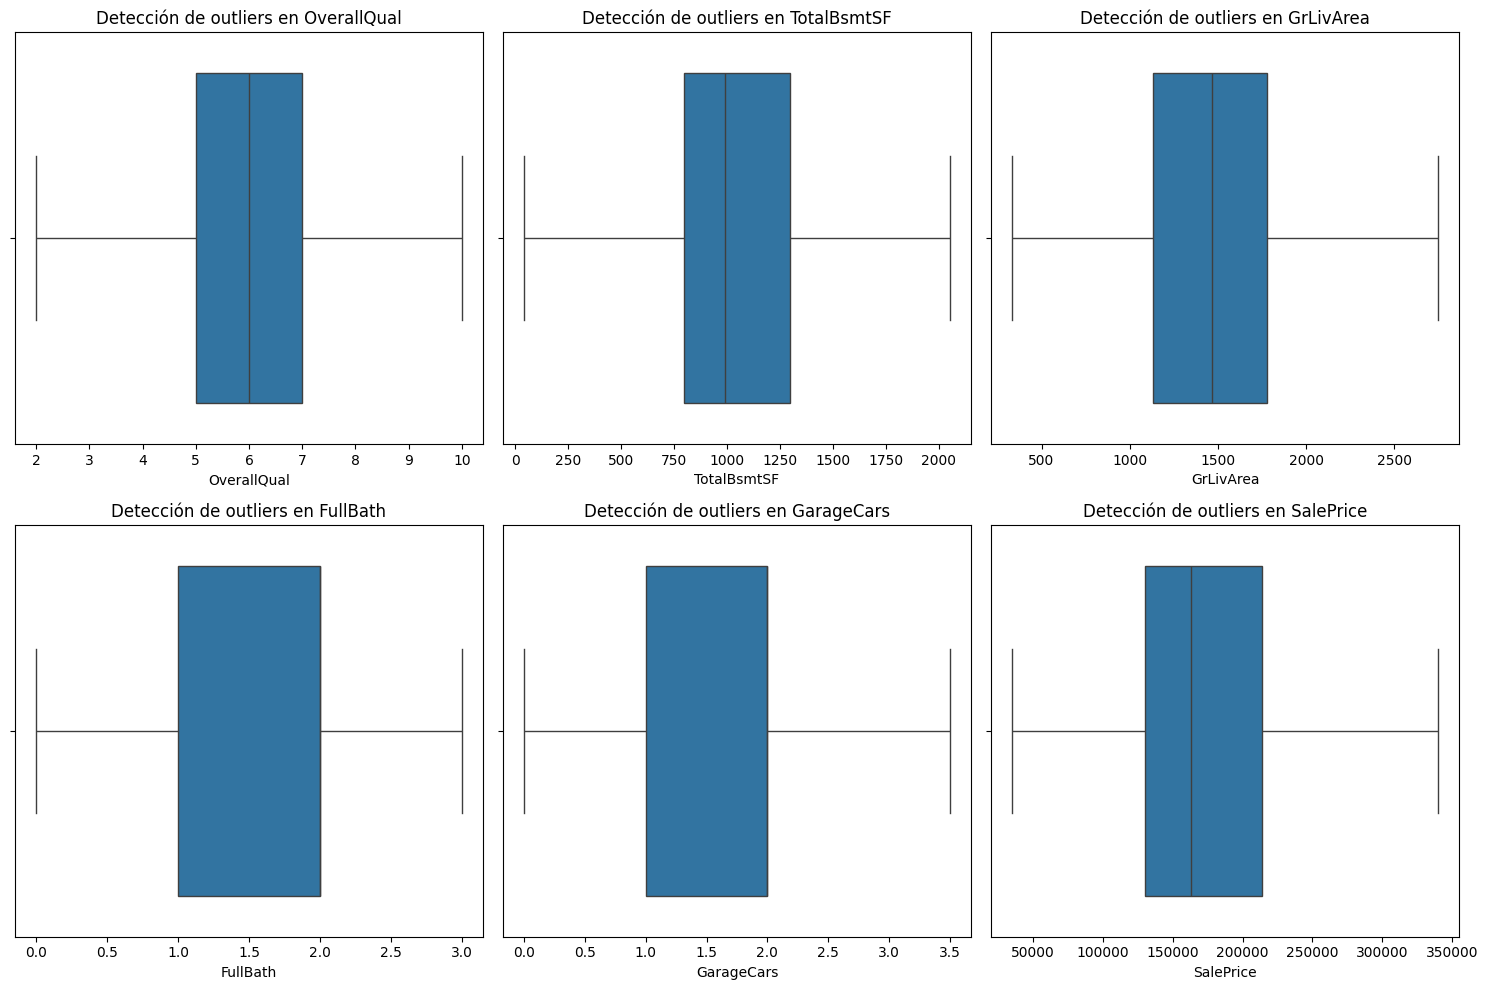

In [72]:
# Se verifica con grafico de cajas si los atipicos fueron reemplazados
# Configurar el tamaño de las filas y columnas
columns_per_row = 3  # Número de gráficos por fila
num_columns = len(numeric_columns.columns)
num_rows = math.ceil(num_columns / columns_per_row)  # Calcular el número de filas necesarias

# Crear el lienzo con subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, num_rows * 5))  # Ajustar tamaño
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Crear un boxplot para cada columna
for i, col in enumerate(numeric_columns.columns):
    sns.boxplot(data=data_train, x=col, ax=axes[i])
    axes[i].set_title(f'Detección de outliers en {col}')  # Título del gráfico

# Eliminar ejes sobrantes si los hay
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Feature Engineering

## División de los datos

In [73]:
# Se crean las variables X e y
X = data_train.drop('SalePrice', axis=1)
y = data_train['SalePrice']

In [74]:
# Division 70-30 de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (1022, 44)
Dimensiones de y_train: (1022,)
Dimensiones de X_test: (438, 44)
Dimensiones de y_test: (438,)


## Datos de entrenamiento

### Codificación de variables categóricas

Se utilizará un codificador de objetivos (TargetEncoder) para transformar las variables categóricas en el conjunto de entrenamiento (X_train) en valores numéricos, basándose en la relación entre las categorías y el objetivo (y_train)

In [80]:
# Se aplica el encoding a las variables categoricas
variables_categoricas = data_train.select_dtypes(include=['category']).columns.tolist()
encoder = TargetEncoder(cols=variables_categoricas)
X_train[variables_categoricas] = encoder.fit_transform(X_train[variables_categoricas], y_train)

In [83]:
# Se verifica como quedaron los valores de X_train
X_train

MSSubClass       MSZoning       LotShape    LandContour  \
135   182196.556878  187337.821561  164212.472571  177182.453664   
1452  163519.143228  126071.671282  164212.472571  177182.453664   
762   230364.883662  211039.952759  164212.472571  177182.453664   
932   182196.556878  187337.821561  198875.758721  177182.453664   
435   230364.883662  187337.821561  210119.087119  177182.453664   
629   171829.226519  187337.821561  164212.472571  177182.453664   
1210  230364.883662  187337.821561  164212.472571  177182.453664   
1118  171829.226519  187337.821561  164212.472571  177182.453664   
1084  230364.883662  187337.821561  210119.087119  177182.453664   
158   230364.883662  211039.952759  164212.472571  177182.453664   
967   182196.556878  187337.821561  198875.758721  177182.453664   
1259  182196.556878  187337.821561  164212.472571  177182.453664   
551   182196.556878  126071.671282  164212.472571  177182.453664   
497   142270.796615  187337.821561  164212.472571  177182.453664   
1031  180469.757810  187337.821561  164212.472571  177182.453664   
1262  142270.796615  187337.821561  164212.472571  177182.453664   
1013  101910.667801  126071.671282  164212.472571  177182.453664   
1311  182196.556878  187337.821561  164212.472571  177182.453664   
566   230364.883662  187337.821561  198875.758721  177182.453664   
610   230364.883662  187337.821561  164212.472571  177182.453664   
1278  230364.883662  187337.821561  164212.472571  177182.453664   
1263  171297.083724  187337.821561  164212.472571  177182.453664   
816   182196.556878  187337.821561  198875.758721  177182.453664   
438   101910.667801  187337.821561  164212.472571  177182.453664   
940   140410.352792  187337.821561  198875.758721  177182.453664   
96    182196.556878  187337.821561  198875.758721  177182.453664   
560   182196.556878  187337.821561  198875.758721  177182.453664   
1182  230364.883662  187337.821561  198875.758721  177182.453664   
471   230364.883662  187337.821561  164212.472571  177182.453664   
1004  200379.615206  187337.821561  164212.472571  177182.453664   
410   182196.556878  187337.821561  164212.472571  177182.453664   
963   182196.556878  187337.821561  198875.758721  177182.453664   
582   140410.352792  187337.821561  164212.472571  177182.453664   
156   182196.556878  187337.821561  164212.472571  177182.453664   
594   182196.556878  187337.821561  198875.758721  177182.453664   
617   160550.983836  187337.821561  164212.472571  220951.264656   
447   230364.883662  187337.821561  198875.758721  177182.453664   
1205  182196.556878  187337.821561  198875.758721  177182.453664   
861   149183.527880  187337.821561  164212.472571  177182.453664   
1010  142270.796615  187337.821561  164212.472571  177182.453664   
390   142270.796615  187337.821561  164212.472571  177182.453664   
1409  230364.883662  187337.821561  198875.758721  177182.453664   
847   182196.556878  187337.821561  198875.758721  177182.453664   
1284  142270.796615  187337.821561  164212.472571  177182.453664   
615   169593.016792  187337.821561  164212.472571  177182.453664   
613   182196.556878  187337.821561  164212.472571  177182.453664   
1303  182196.556878  187337.821561  164212.472571  177182.453664   
486   182196.556878  187337.821561  164212.472571  177182.453664   
561   182196.556878  187337.821561  164212.472571  177182.453664   
308   101910.667801  187337.821561  198875.758721  177182.453664   
461   171297.083724  187337.821561  164212.472571  177182.453664   
1142  230364.883662  187337.821561  164212.472571  177182.453664   
730   200379.615206  187337.821561  198875.758721  177182.453664   
1155  182196.556878  187337.821561  198875.758721  177182.453664   
1203  182196.556878  187337.821561  164212.472571  177182.453664   
700   182196.556878  187337.821561  164212.472571  177182.453664   
849   171829.226519  187337.821561  164212.472571  177182.453664   
1260  230364.883662  187337.821561  188055.060207  177182.453664 

### Estandarización de los datos
Se utilizará PowerTransformer que una técnica que transforma los datos para hacerlos más parecidos a una distribución normal. Esto puede mejorar el desempeño de los modelos que suponen normalidad en las características (como regresión lineal, SVM, etc.)

In [85]:
# Una vez aplicado el encoding se normalizan las variables para que tengan media 0 y desviación estandar 1
# y conserven la misma escala
scaler_train = PowerTransformer(method='yeo-johnson', standardize=True)

In [86]:
X_train[X_train.columns] = scaler_train.fit_transform(X_train[X_train.columns])

d:\carpetas_sistema\escritorio\Especializacion\11. Machine Learning\Talleres\taller1_ML\venv\Lib\site-packages\numpy\_core\_methods.py:197: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
d:\carpetas_sistema\escritorio\Especializacion\11. Machine Learning\Talleres\taller1_ML\venv\Lib\site-packages\numpy\_core\_methods.py:208: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [88]:
# Se verifica como quedaron los valores de X_train
X_train

MSSubClass  MSZoning      LotShape  LandContour     LotConfig  \
135     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1452   -0.524881 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
762     1.553626  2.937222 -1.720846e-15    -0.007857 -1.110223e-16   
932     0.035580  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
435     1.553626  0.240152  3.830269e-15    -0.007857  1.498801e-15   
629    -0.277610  0.240152 -1.720846e-15    -0.007857 -1.665335e-16   
1210    1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1118   -0.277610  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1084    1.553626  0.240152  3.830269e-15    -0.007857 -1.665335e-16   
158     1.553626  2.937222 -1.720846e-15    -0.007857 -1.665335e-16   
967     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1259    0.035580  0.240152 -1.720846e-15    -0.007857  0.000000e+00   
551     0.035580 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
497    -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1031   -0.016940  0.240152 -1.720846e-15    -0.007857 -1.665335e-16   
1262   -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1013   -2.239016 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
1311    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
566     1.553626  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
610     1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1278    1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1263   -0.293546  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
816     0.035580  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
438    -2.239016  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
940    -1.193733  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
96      0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
560     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1182    1.553626  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
471     1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1004    0.596886  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
410     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
963     0.035580  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
582    -1.193733  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
156     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
594     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
617    -0.612361  0.240152 -1.720846e-15     3.899417 -1.665335e-16   
447     1.553626  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
1205    0.035580  0.240152  2.831069e-15    -0.007857  1.498801e-15   
861    -0.943170  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1010   -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
390    -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1409    1.553626  0.240152  2.831069e-15    -0.007857  1.498801e-15   
847     0.035580  0.240152  2.831069e-15    -0.007857  1.498801e-15   
1284   -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
615    -0.344485  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
613     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1303    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
486     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
561     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
308    -2.239016  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
461    -0.293546  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1142    1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
730     0.596886  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1155    0.035580  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
1203    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
700     0.035580  0.240152 -1.

## Datos de prueba
Se hace lo mismo que se hizo con los datos de entrenamiento

### Codificación de variables categóricas

In [89]:
# Aplicar la misma codificación a los datos de test
X_test[variables_categoricas] = encoder.transform(X_test[variables_categoricas])

In [90]:
X_test

MSSubClass       MSZoning       LotShape    LandContour  \
892   182196.556878  187337.821561  164212.472571  177182.453664   
1105  230364.883662  187337.821561  198875.758721  177182.453664   
413   101910.667801  126071.671282  164212.472571  177182.453664   
522   142270.796615  126071.671282  164212.472571  177182.453664   
1036  182196.556878  187337.821561  198875.758721  220951.264656   
614   163519.143228  126071.671282  164212.472571  177182.453664   
218   142270.796615  187337.821561  198875.758721  177182.453664   
1160  142205.488894  187337.821561  164212.472571  177182.453664   
649   163519.143228  126071.671282  164212.472571  177182.453664   
887   142270.796615  187337.821561  198875.758721  177182.453664   
576   142270.796615  187337.821561  164212.472571  177182.453664   
1252  182196.556878  187337.821561  164212.472571  177182.453664   
1061  101910.667801  163348.021475  164212.472571  192032.610808   
567   182196.556878  187337.821561  198875.758721  177182.453664   
1108  230364.883662  187337.821561  164212.472571  177182.453664   
1113  182196.556878  187337.821561  164212.472571  177182.453664   
168   230364.883662  187337.821561  198875.758721  177182.453664   
1102  182196.556878  187337.821561  164212.472571  177182.453664   
1120  101910.667801  126071.671282  164212.472571  145037.372210   
67    182196.556878  187337.821561  198875.758721  177182.453664   
1040  182196.556878  187337.821561  164212.472571  177182.453664   
453   230364.883662  211039.952759  164212.472571  177182.453664   
670   230364.883662  187337.821561  164212.472571  177182.453664   
1094  182196.556878  187337.821561  164212.472571  177182.453664   
192   182196.556878  187337.821561  198875.758721  177182.453664   
123   200379.615206  187337.821561  164212.472571  177182.453664   
415   182196.556878  187337.821561  198875.758721  177182.453664   
277   182196.556878  187337.821561  164212.472571  177182.453664   
433   230364.883662  187337.821561  198875.758721  177182.453664   
1317  200379.615206  211039.952759  164212.472571  177182.453664   
184   142270.796615  187337.821561  198875.758721  177182.453664   
554   230364.883662  187337.821561  164212.472571  177182.453664   
1173  142270.796615  187337.821561  198875.758721  145037.372210   
76    182196.556878  187337.821561  198875.758721  177182.453664   
906   182196.556878  187337.821561  198875.758721  177182.453664   
674   182196.556878  187337.821561  164212.472571  177182.453664   
1398  142270.796615  187337.821561  164212.472571  177182.453664   
374   230364.883662  187337.821561  164212.472571  177182.453664   
1032  230364.883662  187337.821561  198875.758721  177182.453664   
259   182196.556878  126071.671282  164212.472571  177182.453664   
51    142270.796615  126071.671282  164212.472571  177182.453664   
244   230364.883662  187337.821561  198875.758721  177182.453664   
1101  182196.556878  187337.821561  198875.758721  177182.453664   
581   182196.556878  187337.821561  164212.472571  177182.453664   
679   182196.556878  187337.821561  198875.758721  177182.453664   
1132  171297.083724  126071.671282  164212.472571  177182.453664   
1220  182196.556878  187337.821561  198875.758721  177182.453664   
49    182196.556878  187337.821561  164212.472571  177182.453664   
591   230364.883662  187337.821561  198875.758721  177182.453664   
1269  142270.796615  187337.821561  164212.472571  177182.453664   
1249  182196.556878  187337.821561  164212.472571  177182.453664   
1138  182196.556878  187337.821561  198875.758721  177182.453664   
490   142205.488894  126071.671282  164212.472571  177182.453664   
1024  182196.556878  187337.821561  198875.758721  177182.453664   
811   200379.615206  126071.671282  164212.472571  177182.453664   
141   182196.556878  187337.821561  164212.472571  177182.453664   
846   230364.883662  187337.821561  164212.472571  177182.453664   
925   182196.556878  187337.821561  198875.758721  177182.453664 

### Estandarización de los datos

In [91]:

# Aplicar la misma transformación a los datos de test
X_test[X_test.columns] = scaler_train.transform(X_test[X_test.columns])

In [92]:
X_test

MSSubClass  MSZoning      LotShape  LandContour     LotConfig  \
892     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1105    1.553626  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
413    -2.239016 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
522    -1.140955 -1.935729 -1.720846e-15    -0.007857 -1.665335e-16   
1036    0.035580  0.240152  2.831069e-15     3.899417 -1.110223e-16   
614    -0.524881 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
218    -1.140955  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
1160   -1.142811  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
649    -0.524881 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
887    -1.140955  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
576    -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1252    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1061   -2.239016 -1.138979 -1.720846e-15     1.422628 -1.110223e-16   
567     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1108    1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1113    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
168     1.553626  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1102    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1120   -2.239016 -1.935729 -1.720846e-15    -3.595853 -1.110223e-16   
67      0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1040    0.035580  0.240152 -1.720846e-15    -0.007857 -1.665335e-16   
453     1.553626  2.937222 -1.720846e-15    -0.007857 -1.110223e-16   
670     1.553626  0.240152 -1.720846e-15    -0.007857  0.000000e+00   
1094    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
192     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
123     0.596886  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
415     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
277     0.035580  0.240152 -1.720846e-15    -0.007857 -1.665335e-16   
433     1.553626  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
1317    0.596886  2.937222 -1.720846e-15    -0.007857 -1.665335e-16   
184    -1.140955  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
554     1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1173   -1.140955  0.240152  2.831069e-15    -3.595853 -1.110223e-16   
76      0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
906     0.035580  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
674     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1398   -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
374     1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1032    1.553626  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
259     0.035580 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
51     -1.140955 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
244     1.553626  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1101    0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
581     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
679     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1132   -0.293546 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
1220    0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
49      0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
591     1.553626  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
1269   -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1249    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1138    0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
490    -1.142811 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
1024    0.035580  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
811     0.596886 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
141     0.035580  0.240152 -1.

# Entrenamiento y selección de modelos

## Entrenamiento con validación cruzada

In [ ]:
# Métricas a utilizar
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection

In [99]:
# Validación cruzada con KFold
seed = 2
models = []

#logistic Regression
models.append(('LR', LinearRegression()))

# Random Forest
models.append(('RF', RandomForestRegressor()))

# XGB
models.append(('XGB', XGBRegressor()))

# evaluate each model in turn
results = []
names = []

scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

print('Media del desempeño de los modelos en el conjunto de testeo')
print('#'*50)

for name, model in models:
	# Kfol cross validation for model selection
	kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
	#X train , y train
	cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	msg = {}
	msg = {
			'mean': {
					'r2': np.mean(cv_results['test_r2']),
					'neg_mean_absolute_error': np.mean(cv_results['test_neg_mean_absolute_error']),
					'neg_mean_absolute_percentage_error': np.mean(cv_results['test_neg_mean_absolute_percentage_error'])
			},
			'std': {
					'r2': np.std(cv_results['test_r2']),
					'neg_mean_absolute_error': np.std(cv_results['test_neg_mean_absolute_error']),
					'neg_mean_absolute_percentage_error': np.std(cv_results['test_neg_mean_absolute_percentage_error'])
			}
	}	
	print(name)
	print(pd.DataFrame(msg))
	print("#"*50)

Media del desempeño de los modelos en el conjunto de testeo
##################################################
LR
                                            mean          std
r2                                      0.841727     0.060414
neg_mean_absolute_error            -19310.144731  1471.011863
neg_mean_absolute_percentage_error     -0.122268     0.012630
##################################################
RF
                                            mean          std
r2                                      0.866335     0.044696
neg_mean_absolute_error            -16433.792026  1407.144002
neg_mean_absolute_percentage_error     -0.102391     0.010940
##################################################
XGB
                                            mean          std
r2                                      0.867403     0.042815
neg_mean_absolute_error            -16833.041209  1101.329607
neg_mean_absolute_percentage_error     -0.103377     0.010072
#################################

## Selección del modelo


Modelo	R² (mean)	R² (std)
LR	0.8417	0.0604
RF	0.8663	0.0447
XGB	0.8674	0.0428

XGB tiene el mejor R² medio y menor desviación estándar, lo que sugiere mayor estabilidad en su rendimiento.

Modelo	Neg MAE (mean)	Neg MAE (std)
LR	-19,310.14	1,471.01
RF	-16,433.79	1,407.14
XGB	-16,833.04	1,101.33

RF tiene el menor MAE promedio, pero XGB es competitivo con menor desviación estándar, lo que indica más consistencia en su error.

Modelo	Neg MAPE (mean)	Neg MAPE (std)
LR	-0.1223	0.0126
RF	-0.1024	0.0109
XGB	-0.1034	0.0101

RF tiene el menor MAPE promedio, pero XGB tiene una desviación estándar más baja, mostrando resultados más consistentes.

Como conclusión:
XGB tiene el mejor equilibrio entre R² alto, bajo MAE, y consistencia en las métricas (menor desviación estándar en general).
RF también es competitivo, con menor MAE y MAPE promedio, pero su variabilidad es ligeramente mayor.

Entonces el modelo XGBRegressor será el utilizado en el entrenamiento.


In [100]:
# Se procederá a validar la importancia de las variables con el fin de evaluar
# si se puede reducir su cantidad
modelo_sfs = XGBRegressor()
sfs = SequentialFeatureSelector(
    modelo_sfs,
    n_features_to_select='auto',
    direction='forward',
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)
sfs.fit(X_train, y_train)
sfs.get_feature_names_out().tolist()

['MSZoning',
 'LandContour',
 'Neighborhood',
 'Condition2',
 'BldgType',
 'OverallQual',
 'YearRemodAdd',
 'RoofStyle',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'TotalBsmtSF',
 'CentralAir',
 'GrLivArea',
 'Functional',
 'GarageCars',
 'GarageQual',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [102]:
variables_seleccionadas = sfs.get_feature_names_out().tolist()
variables_seleccionadas

['MSZoning',
 'LandContour',
 'Neighborhood',
 'Condition2',
 'BldgType',
 'OverallQual',
 'YearRemodAdd',
 'RoofStyle',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'TotalBsmtSF',
 'CentralAir',
 'GrLivArea',
 'Functional',
 'GarageCars',
 'GarageQual',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

Se calcula el Factor de Inflación de Varianza (VIF) para las variables seleccionadas, con el fin de detectar multicolinealidad entre las variables independientes. 
La multicolinealidad ocurre cuando dos o más variables están altamente correlacionadas, lo que puede causar inestabilidad en los coeficientes de un modelo de regresión.

In [104]:
# Cálculo del VIF
vif = pd.DataFrame()
vif['variables'] = X_train[variables_seleccionadas].columns
vif['VIF'] = [variance_inflation_factor(X_train[variables_seleccionadas].values, i) for i in range(X_train[variables_seleccionadas].shape[1])]
vif

variables       VIF
0        MSZoning  1.387671
1     LandContour  1.070056
2    Neighborhood  2.788750
3      Condition2  1.044271
4        BldgType  1.088354
5     OverallQual  3.200881
6    YearRemodAdd  1.826088
7       RoofStyle  1.126138
8        BsmtQual  2.792388
9        BsmtCond  1.223002
10   BsmtExposure  1.534456
11   BsmtFinType1  1.787462
12   BsmtFinType2  1.168467
13    TotalBsmtSF  1.860521
14     CentralAir  1.349817
15      GrLivArea  1.890221
16     Functional  1.137273
17     GarageCars  2.226531
18     GarageQual  1.397832
19     PavedDrive  1.262217
20       SaleType  3.164872
21  SaleCondition  1.276946

No se identifica multicolinealidad en las variables independientes

In [105]:
# Se entrena el modelo Random Forest con las variables seleccionadas
modelo_seleccionado = XGBRegressor(random_state=42, n_jobs=-1)
modelo_seleccionado.fit(X_train[variables_seleccionadas], y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [106]:
# Calcular predicciones
y_pred = modelo_seleccionado.predict(X_test[variables_seleccionadas])

In [107]:
# Calcular metricas de desempeño
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

In [108]:
# Imprimir metricas de desempeño
print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

R2: 0.8914799327965495
MAE: 16460.356485445205
MAPE: 0.1059518734584007


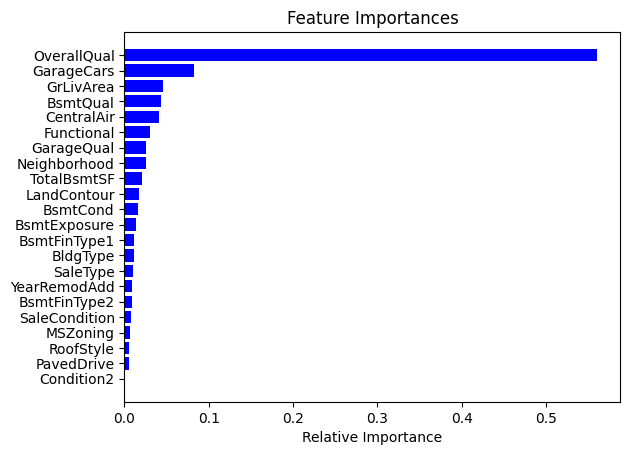

In [109]:
# Gráfica de importancia de las variables para el modelo XGBRegressor
features = X_train[variables_seleccionadas].columns
importances = modelo_seleccionado.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Diagnóstico de los residuos

In [110]:
# Predicciones en el conjunto de entrenamiento
predicciones_entrenamiento = modelo_seleccionado.predict(X_train[variables_seleccionadas])

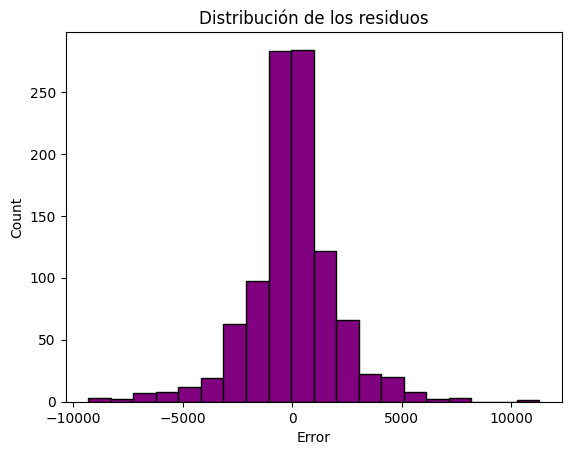

In [112]:
# Calcular los residuos
residuales = predicciones_entrenamiento - y_train

# Plot the residuals in a histogram
plt.hist(residuales, color = 'purple', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribución de los residuos');

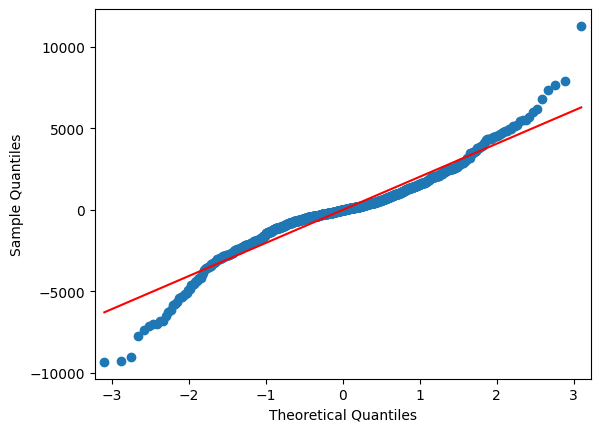

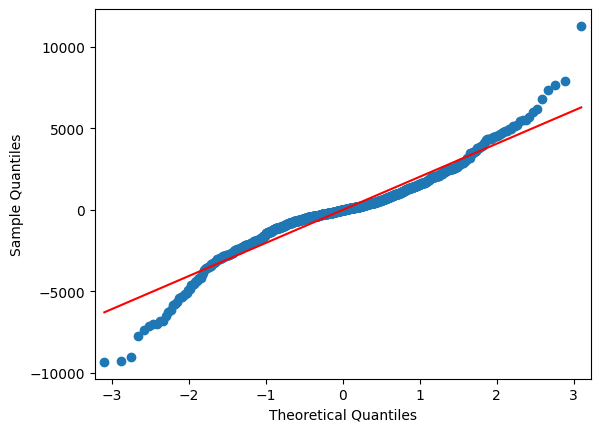

In [115]:
# QQ plot
sm.qqplot(residuales, line='s')

Los residuos parecen distribuirse de forma aleatoria en torno a cero, manteniendo aproximadamente la misma variabilidad a lo largo del eje X. Este patrón apunta a que se cumple la normalidad y la homocedasticidad de los residuos.

### Tests de Normalidad
- **Hipótesis Nula (H0)**: Los residuos siguen una distribución normal.
- **Hipótesis Alternativa (H1)**: Los residuos no siguen una distribución normal.

La hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [117]:
# Normalidad de los residuos Shapiro-Wilk test
shapiro_test = stats.shapiro(residuales)
print(f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

# Normalidad de los residuos D'Agostino's K-squared test
k2, p_value = stats.normaltest(residuales)
print(f"Test D'Agostino's K-squared: estadístico = {k2}, p-value = {p_value}")


Test Shapiro-Wilk: estadístico = 0.9384136522695979, p-value = 3.769418827824038e-20
Test D'Agostino's K-squared: estadístico = 98.76607143284605, p-value = 3.5745394027213977e-22


Para el Test Shapiro-Wilk el estadístico es 0.938, lo que indica que los datos tienen una distribución algo alejada de la normal, ya que valores cercanos a 1 indican una mayor probabilidad de seguir una distribución normal.
El p-value es extremadamente bajo (aproximadamente 
3.77 × 10−20), lo que sugiere que se rechaza la hipótesis nula de normalidad. En otras palabras, hay evidencia estadística suficiente para afirmar que los datos no siguen una distribución normal.

Para el test D'Agostino's K-squared estadístico es 98.77, que es un valor bastante alto, lo que indica una desviación considerable de la normalidad.
El p-value también es muy bajo (3.57×10−22), lo que refuerza la conclusión de que los datos no siguen una distribución normal.

### Homocedasticidad

- **Estadístico (fvalue)**: Este es el valor del estadístico de la prueba. Un valor más alto indica mayor evidencia en contra de la hipótesis nula.

- **p-value (f_p_value)**: Este valor indica la probabilidad de observar un estadístico tan extremo como el calculado, dado que la hipótesis nula es verdadera.

#### Decisiones Basadas en el p-value

- **Si el p-value es menor que un nivel de significancia (por ejemplo, 0.05)**:
- **Rechazamos la hipótesis nula (H0)**. Esto sugiere que hay evidencia suficiente para concluir que hay heterocedasticidad en los residuos, es decir, la varianza de los errores no es constante.

- **Si el p-value es mayor que el nivel de significancia**:
- **No rechazamos la hipótesis nula (H0)**. Esto sugiere que no hay evidencia suficiente para concluir que hay heterocedasticidad, lo que implica que los residuos pueden considerarse homocedásticos.

<Axes: xlabel='SalePrice', ylabel='SalePrice'>

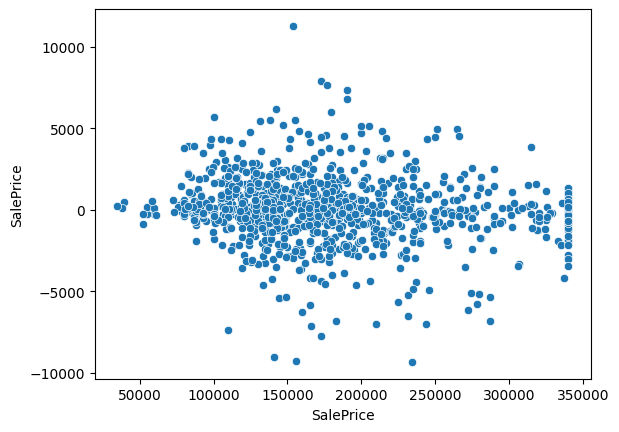

In [118]:
sns.scatterplot(x=y_train, y=residuales)

In [123]:
# Prueba de Breusch-Pagan
predictoras_constante = X_train[variables_seleccionadas]
predictoras_constante['Intercept'] = 1
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuales, predictoras_constante)
print(f"Estadítico= {fvalue}, p-value = {f_p_value}")

Estadítico= 3.0761787032099948, p-value = 1.0318252584116766e-05


C:\Users\Monik\AppData\Local\Temp\ipykernel_16252\1962082784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictoras_constante['Intercept'] = 1


Estadístico (fvalue) = 3.076: Este valor es el estadístico calculado de la prueba. Un valor más alto sugiere una mayor evidencia de heterocedasticidad.
p-value = 1.03x10-5: Dado que el valor p es extremadamente bajo (mucho menor que el umbral común de 0.05), se rechaza la hipótesis nula de que no existe heterocedasticidad.

Con un p-value muy bajo, se concluye que existe heterocedasticidad en los residuos del modelo. Esto indica que la varianza de los residuos no es constante y que puede ser necesario aplicar alguna técnica para corregir la heterocedasticidad, como la transformación de variables o el uso de modelos robustos que no sean tan sensibles a este problema.